In [1]:
# !mkdir models
# !pip install -q numpy opencv-python matplotlib tensorflow

# !bash ./load_models.sh
# !wget --quiet https://upload.wikimedia.org/wikipedia/commons/9/99/JPEG_20190317_010417.jpg -O ./data/test_img.jpg

# 从下面开始运行

In [40]:
from hand_tracker import HandTracker
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
%matplotlib inline
import os
print("hello world")

hello world


In [2]:
palm_model_path = ".\\models\\palm_detection.tflite"
landmark_model_path = ".\\models\\hand_landmark.tflite"
anchors_path = ".\\data\\anchors.csv" 

In [35]:
img = cv2.imread('D:\\jester\\data\\6547\\00028.jpg')[:,:,::-1]

In [36]:
# print(img)

In [37]:
# box_shift determines 
from hand_tracker import HandTracker
detector = HandTracker(palm_model_path, landmark_model_path, anchors_path,
                       box_shift=0.2, box_enlarge=1.3)

palm tensor input 信息 [{'name': 'input_1', 'index': 234, 'shape': array([  1, 256, 256,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]
palm tensor ouput 信息 [{'name': 'regressors/concat', 'index': 295, 'shape': array([   1, 2944,   18]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}, {'name': 'classificators/concat', 'index': 14, 'shape': array([   1, 2944,    1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]
landmark tensor input 信息 [{'name': 'input_1', 'index': 0, 'shape': array([  1, 256, 256,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]
landmark tensor ouput 信 息 [{'name': 'ld_21_2d', 'index': 893, 'shape': array([ 1, 42]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}, {'name': 'output_handflag', 'index': 894, 'shape': array([1, 1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]
hand tracker built ok


[[42.31358059 83.96409574]
 [56.24049866 79.36043886]
 [63.8988047  70.17420937]
 [65.50089892 59.63931772]
 [63.98588945 51.51661912]
 [57.65554171 59.93965634]
 [59.26436478 45.68900828]
 [61.35544237 40.0292507 ]
 [63.18705114 36.55953269]
 [50.02743076 58.38651628]
 [51.06786227 44.43786336]
 [55.24645206 43.64748292]
 [57.75778195 44.93431615]
 [42.55522553 58.96957135]
 [44.03752424 46.12720831]
 [49.06724043 48.08456318]
 [52.11592429 51.81890563]
 [36.59616356 61.60679787]
 [39.81844615 52.4500986 ]
 [44.6911615  55.29708738]
 [48.09574918 59.78324655]] [0.2973712]


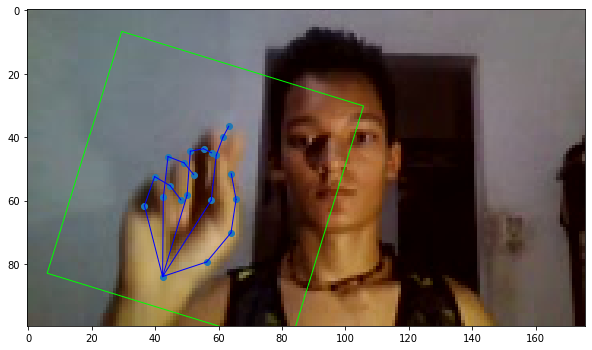

In [38]:
kp, box, conf = detector(img)
print(kp, conf)
f,ax = plt.subplots(1,1, figsize=(10, 10))

ax.imshow(img)

ax.scatter(kp[:,0], kp[:,1])
from matplotlib.lines import Line2D
# 加线条
for finger_index in range(5):
    start = finger_index * 4 + 1
    ax.add_line(Line2D((kp[0][0],kp[start][0]), (kp[0][1],kp[start][1]), linewidth=1, color='blue'))
    for k in range(start, start+3):
        ax.add_line(Line2D((kp[k][0],kp[k+1][0]), (kp[k][1],kp[k+1][1]), linewidth=1, color='blue'))

ax.add_patch(Polygon(box, color="#00ff00", fill=False))

In [19]:
print(f, ax)

Figure(720x720) AxesSubplot(0.125,0.28233;0.775x0.440341)


In [48]:
f.canvas.draw()
data = np.fromstring(f.canvas.tostring_rgb(), dtype=np.uint8) 
data = data.reshape(f.canvas.get_width_height()[::-1] + (3,)) 

C:\Users\zys98\Anaconda3\envs\ht-1\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [49]:
cv2.imwrite("end.png", data)

True

[[67.08602937 94.13360795]
 [57.91899289 86.63346061]
 [53.96400403 82.77894976]
 [49.09809463 80.68345844]
 [43.88102513 79.79978204]
 [55.9021821  75.5202126 ]
 [47.10633582 74.16784477]
 [39.57695314 75.34607304]
 [34.39686197 77.85639607]
 [58.50906675 79.99045687]
 [47.8541759  80.16276268]
 [41.1087216  82.73775372]
 [36.28838387 84.92292039]
 [60.56266    85.36742786]
 [49.85220293 87.52046291]
 [45.24473948 90.75197589]
 [41.9194498  92.48002918]
 [61.95498746 91.99862792]
 [53.83141946 93.62259611]
 [50.54612903 95.49694899]
 [47.49121818 96.50517669]] [0.]
[[100.40121577 111.42507426]
 [ 95.63513816 101.15120245]
 [ 92.81522602  90.99845472]
 [ 92.61777148  80.85157199]
 [ 91.80785876  75.50978711]
 [100.63682366  79.57837434]
 [106.41687856  67.49805806]
 [105.75361668  66.20231312]
 [104.79475902  66.72108898]
 [104.82707093  79.96726393]
 [108.36288805  69.75645794]
 [107.24068273  68.65259108]
 [106.03438799  68.59449548]
 [107.18785449  82.37930388]
 [110.6563321   73.40

[[51.84653703 78.4355139 ]
 [61.63081884 72.74550875]
 [65.74299542 63.70873252]
 [65.1451332  53.34247132]
 [62.24211745 47.91001158]
 [64.98664587 52.70138251]
 [61.81475641 39.52117848]
 [58.32399121 39.12633361]
 [57.23806696 42.61930726]
 [56.5979713  50.45499722]
 [53.89216358 40.72152014]
 [52.0327489  42.25820767]
 [53.0381212  47.98568052]
 [49.24986271 51.31934203]
 [47.06066906 43.38163139]
 [44.87877277 47.28008014]
 [46.03754622 53.08500301]
 [42.95979124 53.89660311]
 [41.65351378 48.34495687]
 [41.94996181 51.20973536]
 [43.24476374 54.76972349]] [0.]
[[55.06797935 65.72984448]
 [68.0843126  60.58246397]
 [71.52082231 50.88470172]
 [66.97053715 41.15703632]
 [61.42303244 31.72874667]
 [67.45596381 46.49432324]
 [66.20195701 28.37061415]
 [65.66577534 20.45097727]
 [64.96085745 16.4385164 ]
 [58.16902164 47.49777071]
 [57.41375852 29.74376134]
 [58.45440612 22.69159335]
 [59.01311014 19.57807313]
 [49.31284777 49.55996872]
 [47.97041486 34.33067734]
 [50.74506694 32.13784

C:\Users\zys98\Anaconda3\envs\ht-1\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


[[51.78503432 56.5862349 ]
 [44.88025655 50.92804759]
 [43.40453203 42.3115433 ]
 [46.77988886 34.38683928]
 [50.14675742 29.13569586]
 [57.43296276 36.26115153]
 [60.0111631  22.28084784]
 [60.16135493 15.32509505]
 [59.94638861 10.75530322]
 [62.88039939 34.55855683]
 [64.02500654 17.73257073]
 [64.05391675 10.82079942]
 [62.85551193  7.93094789]
 [65.08019374 33.71483175]
 [63.66711941 19.36418745]
 [63.02744146 17.58385393]
 [62.20023859 17.65664921]
 [64.87231226 34.32782814]
 [64.7797058  23.0196179 ]
 [63.18488745 20.81880559]
 [61.41805057 19.87544992]] [9.053963e-07]
[[47.5778198  54.60194852]
 [56.29993247 48.87921036]
 [60.77023765 39.63950781]
 [61.37807012 29.99765876]
 [59.8425945  23.41308608]
 [63.83254499 32.76795672]
 [67.66023591 21.59640618]
 [68.79742812 14.58452964]
 [69.05688058  8.99361   ]
 [58.67609285 29.83906575]
 [61.48237588 17.94051093]
 [62.05569019 11.65929235]
 [61.93856978  6.23475441]
 [51.88100385 29.80516951]
 [52.05326414 19.50749821]
 [53.4695905

[[47.83018476 97.52778079]
 [51.53446427 94.69034489]
 [55.86204691 90.06594721]
 [58.85489371 84.18735896]
 [60.40434474 80.62386557]
 [49.51123378 80.49880577]
 [52.06900579 71.56743701]
 [54.43124472 68.96703801]
 [57.50293116 69.28715129]
 [47.38883859 78.67493779]
 [51.07899068 70.58766913]
 [54.75444362 68.78747957]
 [57.84230765 70.03017568]
 [46.94032524 79.29893307]
 [50.70012081 72.70570588]
 [53.10024361 71.96350978]
 [55.35371872 72.86599238]
 [47.51840471 81.30675742]
 [50.53231544 77.25044455]
 [51.98931469 76.35472651]
 [53.60369104 76.21078294]] [0.]
[[48.51582901 94.47877472]
 [51.01200253 88.39097913]
 [54.62110549 84.17195696]
 [56.64238588 79.03689286]
 [57.47491273 75.81290398]
 [50.44482146 78.35256673]
 [50.61788758 69.34810726]
 [51.85714413 65.64831187]
 [53.80744553 64.55006326]
 [47.66885218 79.60784512]
 [49.75835068 71.59484018]
 [53.36465739 70.74842448]
 [56.57076339 71.86960685]
 [45.98264407 83.40092434]
 [47.72011317 80.11246537]
 [50.27679549 82.33182

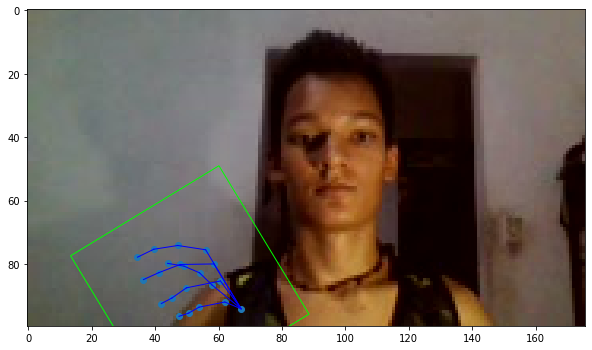

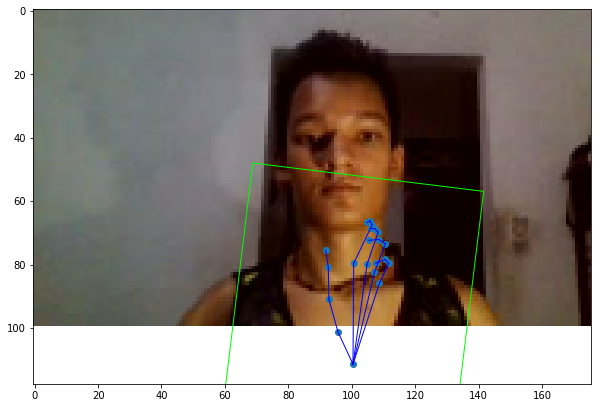

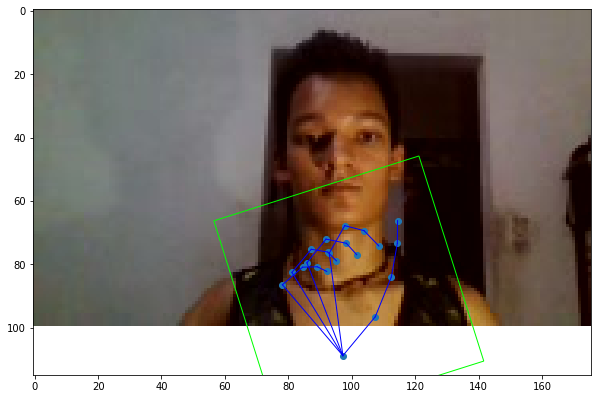

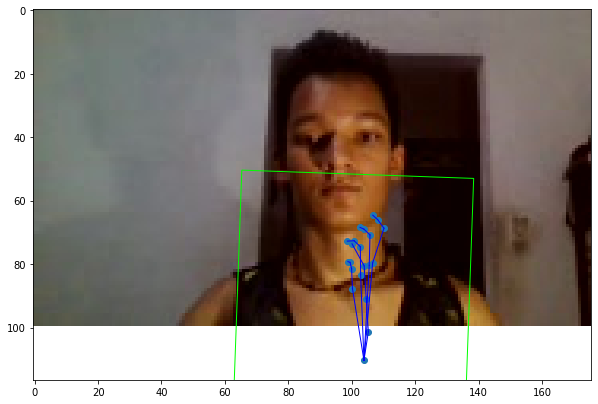

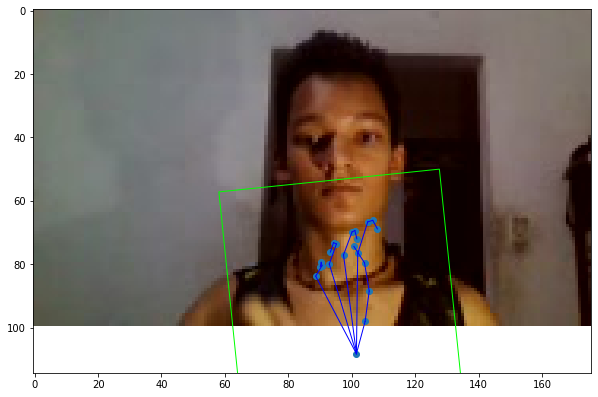

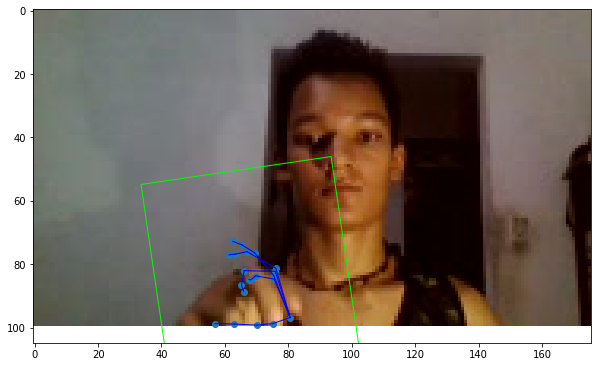

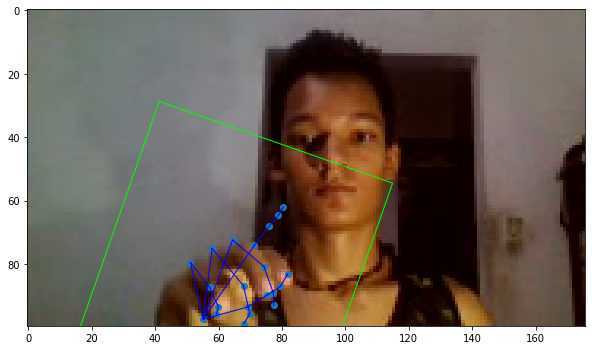

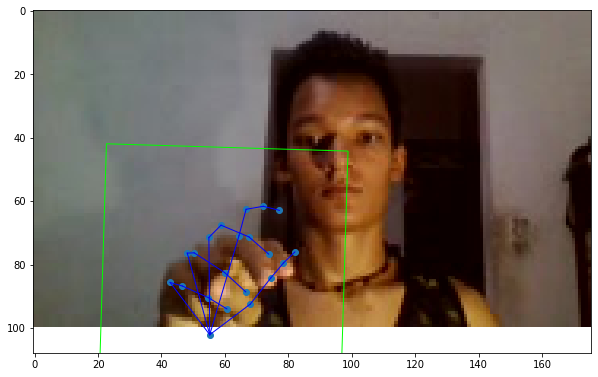

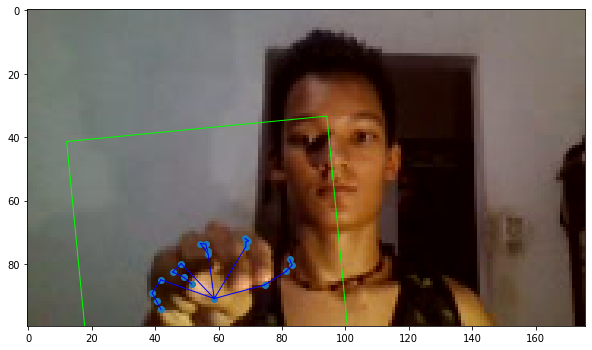

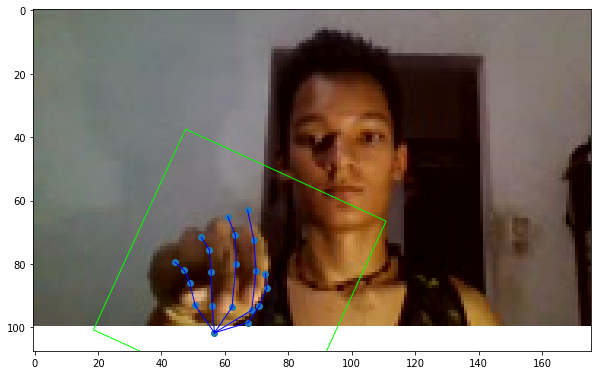

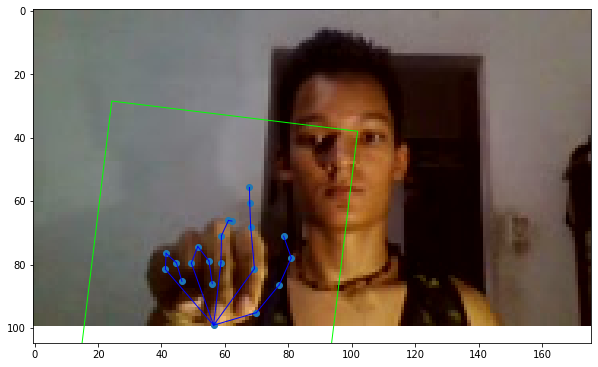

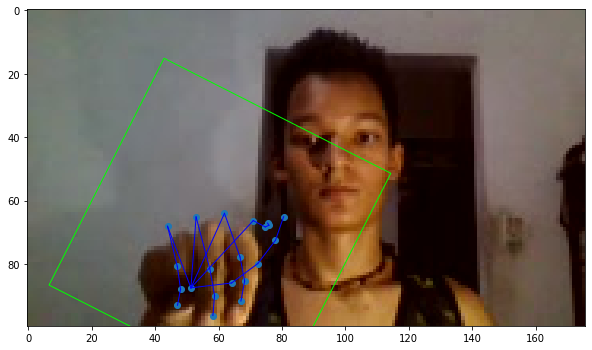

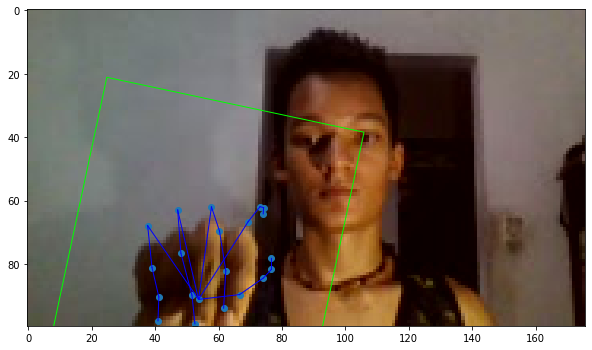

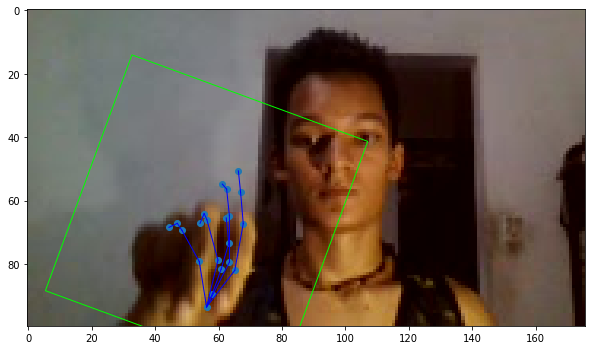

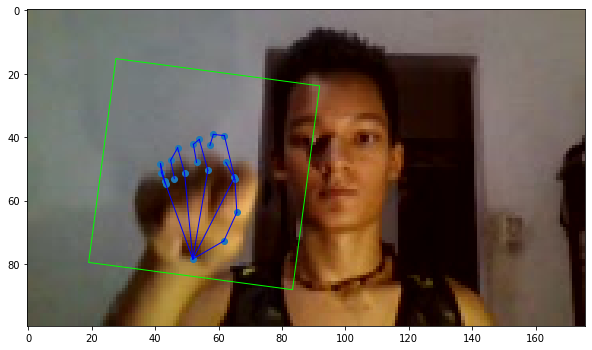

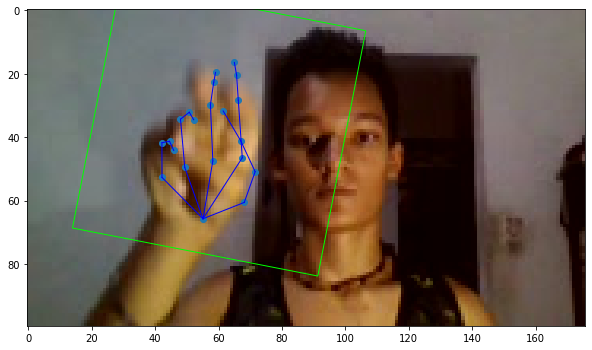

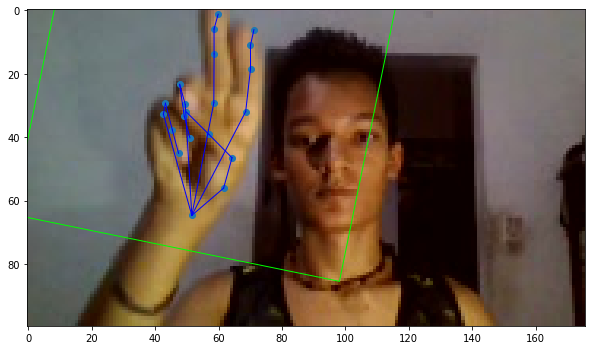

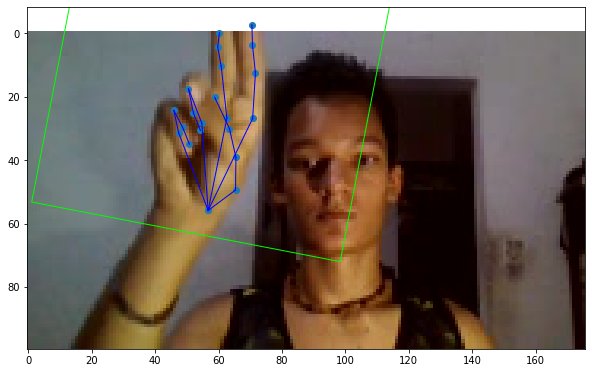

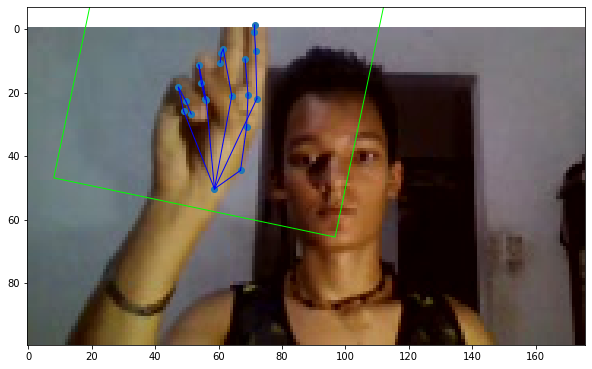

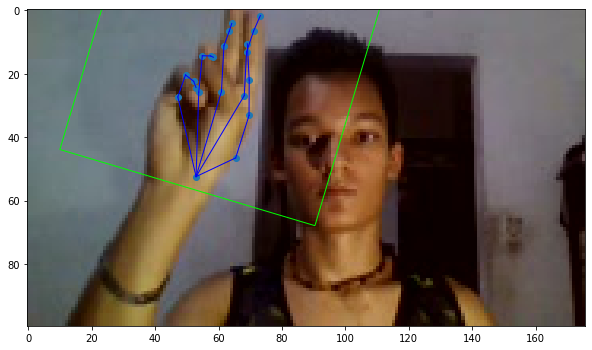

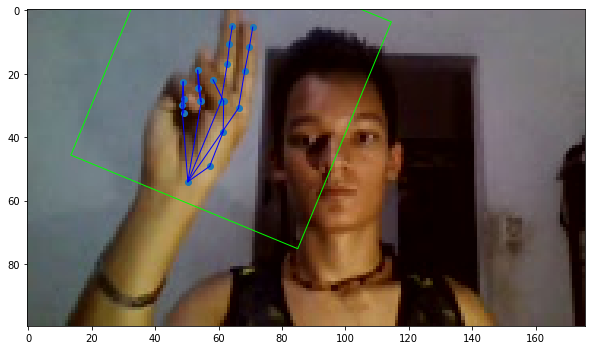

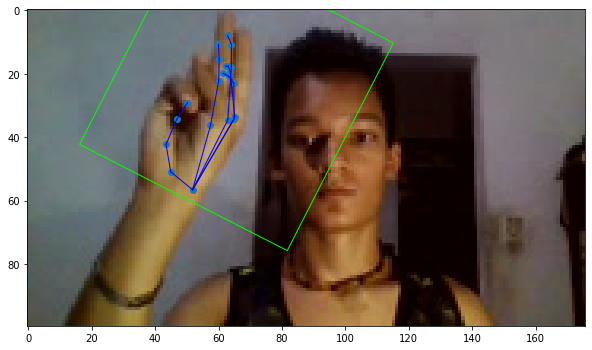

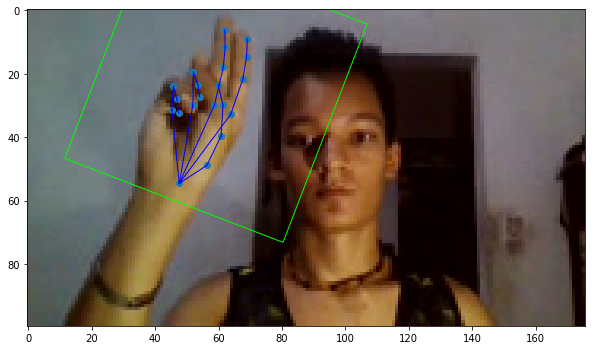

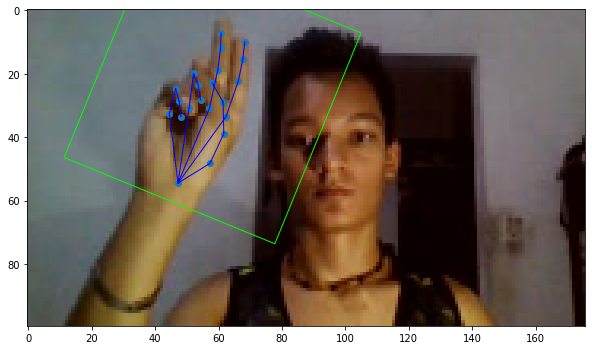

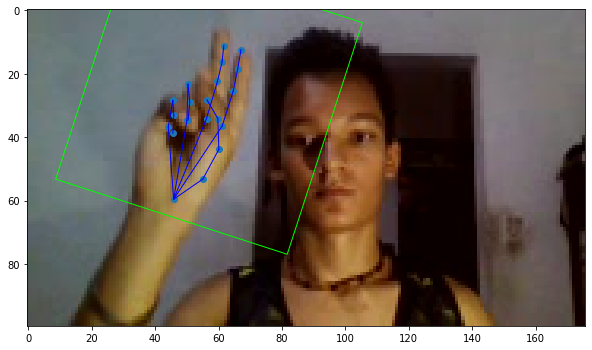

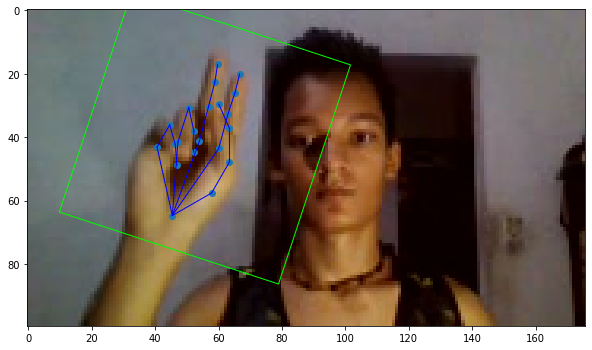

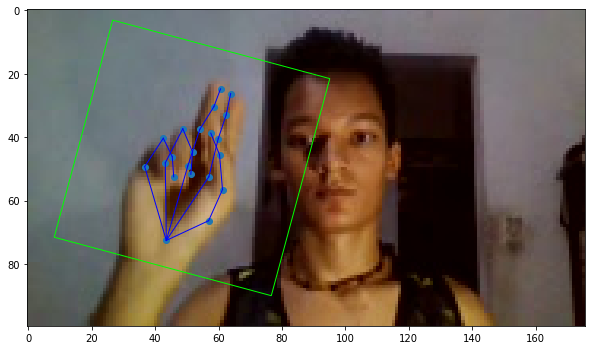

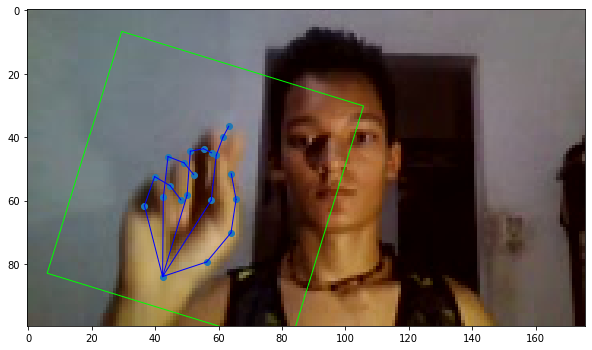

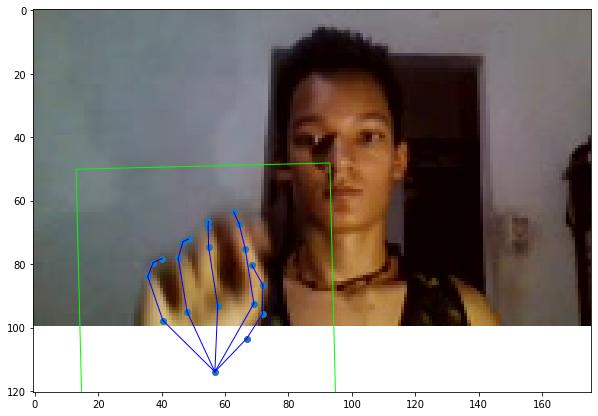

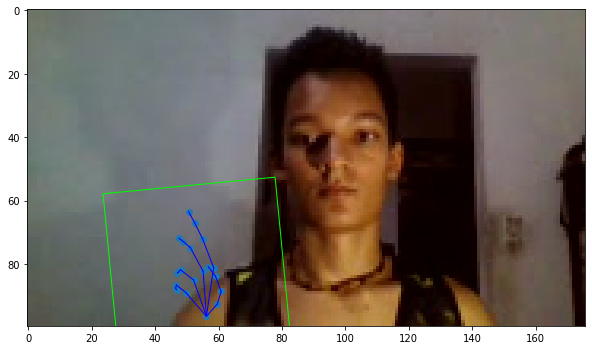

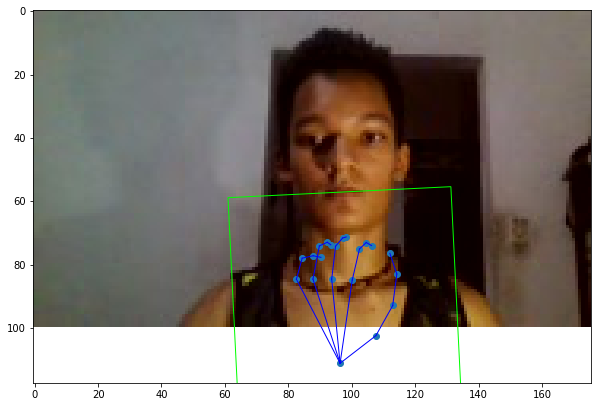

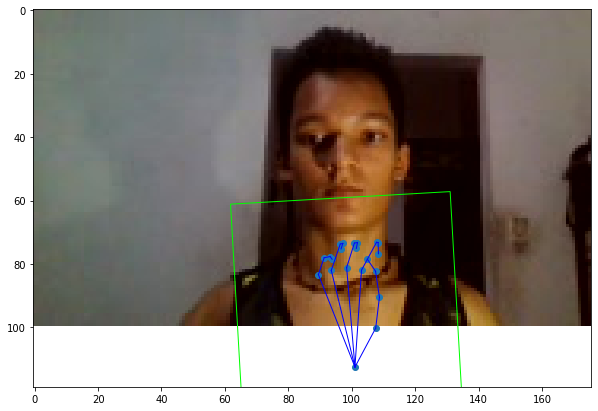

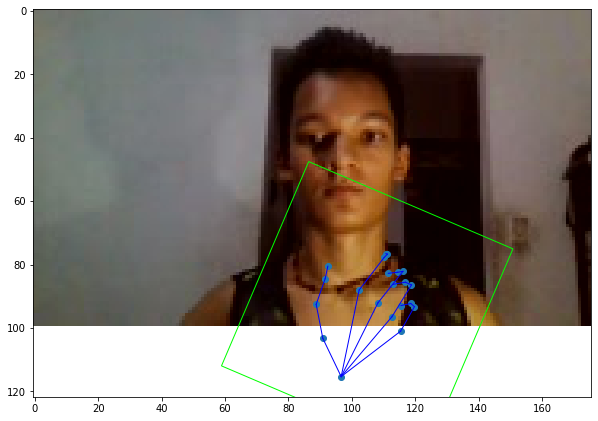

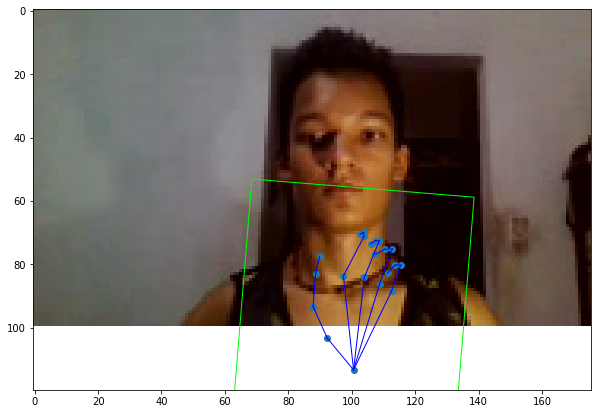

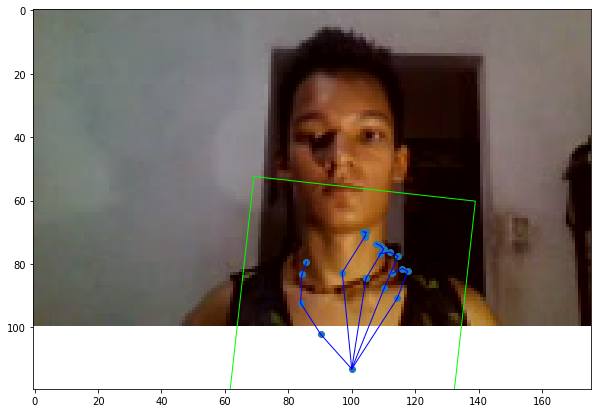

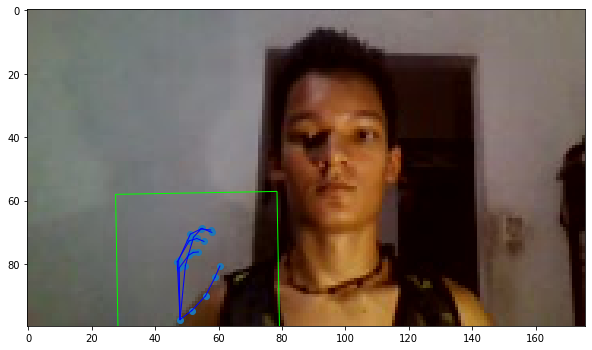

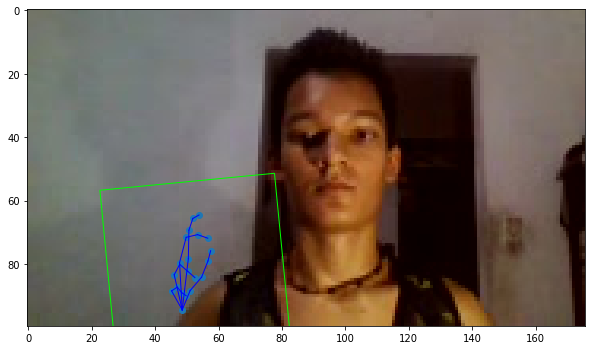

In [41]:
# 测试多个图片

root = 'D:\\jester\\data\\6547'
filelist = os.listdir(root)

for fname in filelist:
    path = root+'\\'+fname
    img = cv2.imread(path)[:,:,::-1]

    kp, box, conf = detector(img)
    print(kp, conf)
    f,ax = plt.subplots(1,1, figsize=(10, 10))

    ax.imshow(img)

    ax.scatter(kp[:,0], kp[:,1])
    from matplotlib.lines import Line2D
    # 加线条
    for finger_index in range(5):
        start = finger_index * 4 + 1
        ax.add_line(Line2D((kp[0][0],kp[start][0]), (kp[0][1],kp[start][1]), linewidth=1, color='blue'))
        for k in range(start, start+3):
            ax.add_line(Line2D((kp[k][0],kp[k+1][0]), (kp[k][1],kp[k+1][1]), linewidth=1, color='blue'))

    ax.add_patch(Polygon(box, color="#00ff00", fill=False))